# Импортирую нужные модули

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
random.seed = 23

In [7]:
from pymorphy2 import MorphAnalyzer
morph = MorphAnalyzer()
from nltk.tokenize import word_tokenize
from nltk import ngrams

In [8]:
import pandas as pd

In [9]:
import json

In [10]:
import collections
from collections import Counter

In [48]:
from nltk.draw.dispersion import dispersion_plot

# Код

Открываю книгу заново и с помощью пайморфи разбираю текст.

In [12]:
with open('kniga.txt', encoding='utf-8') as f:
    text = f.read()

In [13]:
words = [w.lower() for w in word_tokenize(text) if w.isalpha()]
list_of_parse = []
lemmas_POS = {}
for word in words:
    p = morph.parse(word)
    list_of_parse.append(p[0])

## 1. Датафрейм

Создаю список из словарей с разборами слов, в котором каждому важной грамматической категории присваиваю название. 
Потом перевожу разметку в датафрейм.

In [14]:
dict = {}
lst = []
for word in list_of_parse:
    dct = {'слово': word.word, 'лемма': word.normal_form, 'часть речи': word.tag.POS, 'падеж': word.tag.case, 
           'одушевленность': word.tag.animacy, 'род': word.tag.gender, 'включенность говорящего в действие': word.tag.involvement,
          'наклонение': word.tag.mood, 'число': word.tag.number, 'лицо': word.tag.person, 
           'время': word.tag.tense, 'переходность': word.tag.transitivity, 'залог': word.tag.voice, 'аспект': word.tag.aspect}
    lst.append(dct)
kniga = pd.DataFrame(lst)
kniga

,аспект,включенность говорящего в действие,время,залог,лемма,лицо,наклонение,одушевленность,падеж,переходность,род,слово,часть речи,число
0,None,None,None,None,annotation,None,None,None,None,None,None,annotation,None,None
1,None,None,None,None,преступление,None,None,inan,accs,None,neut,преступление,NOUN,sing
2,None,None,None,None,и,None,None,None,None,None,None,и,CONJ,None
3,None,None,None,None,наказание,None,None,inan,accs,None,neut,наказание,NOUN,sing
4,None,None,None,None,гениальный,None,None,None,nomn,None,masc,гениальный,ADJF,sing
5,None,None,None,None,роман,None,None,anim,nomn,None,masc,роман,NOUN,sing
6,None,None,None,None,главное,None,None,inan,nomn,None,neut,главные,NOUN,plur
7,None,None,None,None,тема,None,None,inan,gent,None,femn,темы,NOUN,sing
8,None,None,None,None,который,None,None,None,gent,None,neut,которого,ADJF,sing
9,None,None,None,None,преступление,None,None,inan,accs,None,neut,преступление,NOUN,sing


## Визуализация

### 2. Повторяю графики из конспекта

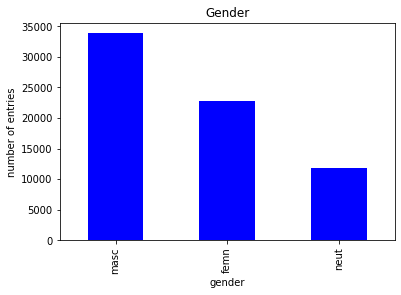

In [15]:
kniga['род'].value_counts().plot.bar(color='blue');
plt.title('Gender')
plt.xlabel('gender')
plt.ylabel('number of entries');

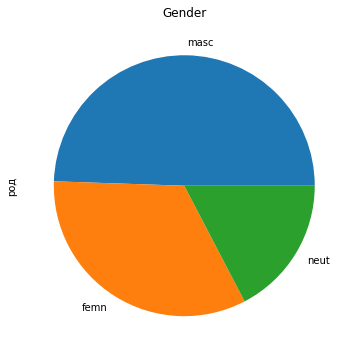

In [16]:
plt.figure(figsize=(6, 6))
kniga['род'].value_counts().plot(kind='pie');
plt.title('Gender');

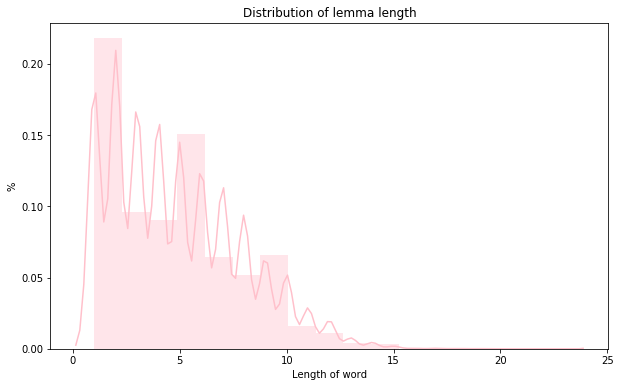

In [42]:
kniga['length'] = kniga['лемма'].apply(len)
plt.figure(figsize=(10, 6))
sns.distplot(kniga['length'], bins=17, color='pink')
plt.title('Distribution of lemma length')
plt.ylabel('%')
plt.xlabel('Length of word');

### 3. Делаю свои графики

Создаю столбчатую диаграмму для количесва частей речи. У нас есть 17 категорий по горизонтали - это части речи, и количество употребления для каждой из них. На распределение данных подобного типа удобно смотреть в столбчатой диаграмме.

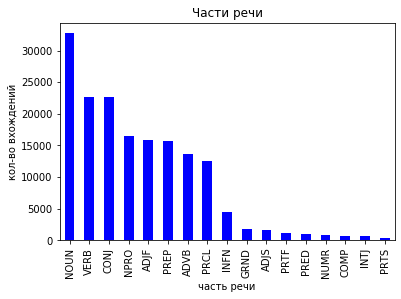

In [27]:
kniga['часть речи'].value_counts().plot.bar(color='blue');
plt.title('Части речи')
plt.xlabel('часть речи')
plt.ylabel('кол-во вхождений');

Круговая диаграмма распеределения глагольных залогов. Есть всего два значения, на круговой диаграмме наглядно видно, какое из них преобладает.

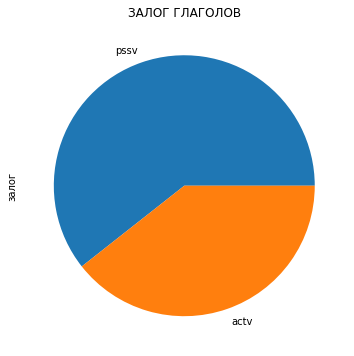

In [62]:
plt.figure(figsize=(6, 6))
kniga['залог'].value_counts().plot(kind='pie');
plt.title('ЗАЛОГ ГЛАГОЛОВ');

К сожалению, у меня не получилось установить модуль wordcloud ни через тетрадь, ни через командную строку. Возникает такая ошибка: "error: Microsoft Visual C++ 14.0 is required". Со структурой друих, более сложных графиков я не смогла разобраться, поэтому снова использовала pie chart и Bar plot в 3 задании. 

## Задание 4

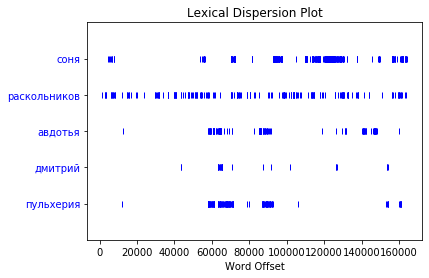

In [61]:
list_of_lemms = []
for word in list_of_parse:
    list_of_lemms.append(word.normal_form)
words = ['соня', 'раскольников', 'авдотья', 'дмитрий', 'пульхерия']
dispersion_plot(list_of_lemms, words)